In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Import the combined dataset
df = pd.read_csv('/Users/jasmine/Documents/GoogleDataAnalytics/Course8/CS1_cyclistic/CyclisticData/csv/combined_cyclistic_data.csv')
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5719877 entries, 0 to 5719876
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 567.3+ MB


In [4]:
df.duplicated().sum()
#no duplicated values in the combined dataset. we can proceed to the next step

0

In [5]:
#Check for null values
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    875716
start_station_id      875848
end_station_name      929202
end_station_id        929343
start_lat                  0
start_lng                  0
end_lat                 6990
end_lng                 6990
member_casual              0
dtype: int64

In [6]:
#Drop all rows with null values
df.dropna(inplace=True)

In [7]:
#Verify that all null values have been removed
df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [8]:
#convert the timestamp into date time
df['started_at'] = df['started_at'].astype('datetime64[s]')
df['ended_at'] = df['ended_at'].astype('datetime64[s]')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4331707 entries, 0 to 5719876
Data columns (total 13 columns):
 #   Column              Dtype        
---  ------              -----        
 0   ride_id             object       
 1   rideable_type       object       
 2   started_at          datetime64[s]
 3   ended_at            datetime64[s]
 4   start_station_name  object       
 5   start_station_id    object       
 6   end_station_name    object       
 7   end_station_id      object       
 8   start_lat           float64      
 9   start_lng           float64      
 10  end_lat             float64      
 11  end_lng             float64      
 12  member_casual       object       
dtypes: datetime64[s](2), float64(4), object(7)
memory usage: 462.7+ MB


In [9]:
#Extracts and append the hour, date, day and month to new columns
df['hour'] = df['started_at'].dt.hour
df['date'] = df['started_at'].dt.day
df['day'] = df['started_at'].dt.day_name()
df['month'] = df['started_at'].dt.month_name()
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,hour,date,day,month
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member,20,21,Saturday,January
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,15,10,Tuesday,January
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,7,2,Monday,January
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,10,22,Sunday,January
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,13,12,Thursday,January


In [10]:
#Calculate the duration of each ride in minutes
df['duration'] = (df['ended_at'] - df['started_at'])/pd.Timedelta(minutes=1)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,hour,date,day,month,duration
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member,20,21,Saturday,January,10.850000
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,15,10,Tuesday,January,8.483333
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,7,2,Monday,January,13.233333
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,10,22,Sunday,January,8.766667
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,13,12,Thursday,January,15.316667


In [11]:
#Check for negative duration
df[df['duration'] <= 0].count()

ride_id               569
rideable_type         569
started_at            569
ended_at              569
start_station_name    569
start_station_id      569
end_station_name      569
end_station_id        569
start_lat             569
start_lng             569
end_lat               569
end_lng               569
member_casual         569
hour                  569
date                  569
day                   569
month                 569
duration              569
dtype: int64

Clearly there should not be legitimate rides which log 0 or less minutes, hence these are removed.

In [12]:
#Drop rows with negative duration
df.drop(df[df['duration'] <= 0].index, inplace=True)

In [13]:
#Verify that no rows with negative duration remain
df[df['duration'] <= 0].count()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
hour                  0
date                  0
day                   0
month                 0
duration              0
dtype: int64

Calling the information for the 'duration' column as I do suspect that there are ride durations that do not seem realistic.

* for instance rides that are between 0 minutes to less than a minute long
* for instance rides that are over a day long

In [14]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df['duration'].describe()

count   4331138.00
mean         15.95
std          36.09
min           0.02
25%           5.62
50%           9.80
75%          17.48
max       12136.30
Name: duration, dtype: float64

As expected, there are data which do not seem realistic. 

For instance, the shortest ride duration is only 0.02 minutes long, and the longest is at a whooping 12,136 minutes long. Let's have a closer look at the data by plotting it out.

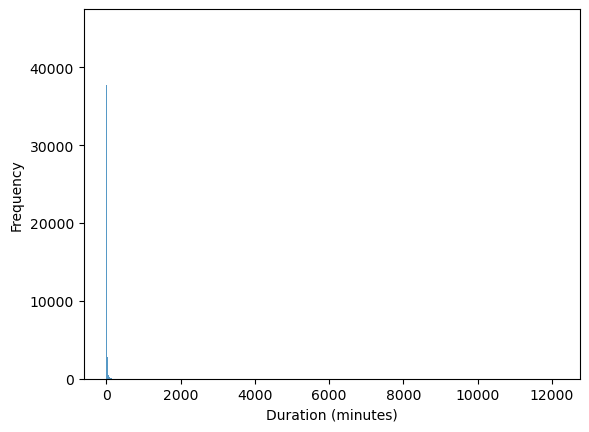

In [15]:
#Histogram plot of duration after dropping rows with non-legitimate duration lengths
sns.histplot(df['duration'], kde=False)
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

The histogram plot does not tell us much about the outliers, but we can see that the largest value on the x axis is 12000 minutes. Let's take a closer look by plotting the scatterplot of frequency vs duration.

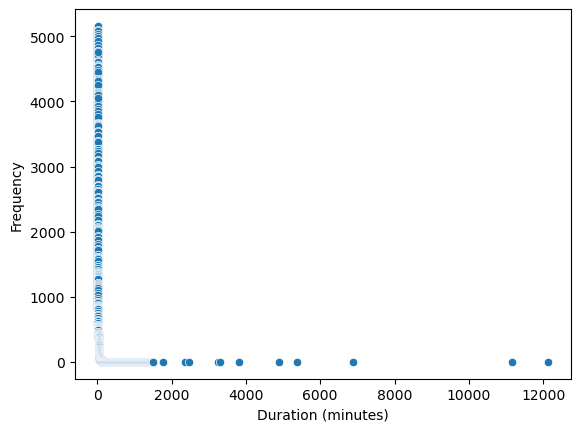

In [16]:
#Frequency count for each duration
duration_counts = df['duration'].value_counts().sort_index()

#Plot scatterplot
sns.scatterplot(data=duration_counts, x=duration_counts.index, y=duration_counts.values)
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

Drop duration values that are less than a minute long (not realistic) and over a day (1440 minutes) long. (outliers)

In [17]:
df.drop(df[(df['duration'] < 1) | (df['duration'] > 1440)].index, inplace=True)

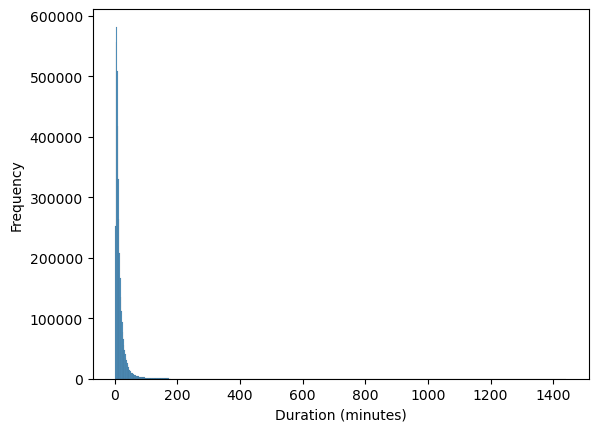

In [28]:
#Histogram plot of duration after dropping unrealistic durations and outliers
sns.histplot(df['duration'], binwidth=2, kde=False)
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

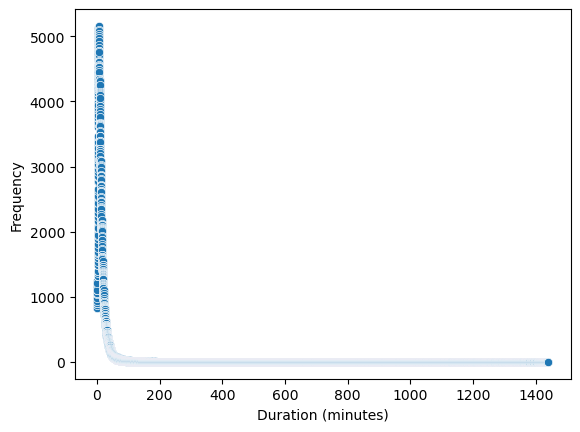

In [20]:
#Scatterplot of duration after dropping unrealistic durations and outliers

#Frequency count for each duration
duration_counts = df['duration'].value_counts().sort_index()

#Plot scatterplot
sns.scatterplot(data=duration_counts, x=duration_counts.index, y=duration_counts.values)
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

The plots do look slightly better, but it still skews heavily to the left and the bulk of the data is concentrated between 1 to 100 minutes long. Additionally, there is still outlier data even after removing rides that are non-legitimate. 

Let's look into the description and frequency count of the duration column after non-legitimate ride values are dropped.

In [24]:
df['duration'].describe()

count   4244056.00
mean         16.22
std          34.12
min           1.00
25%           5.83
50%          10.02
75%          17.73
max        1439.87
Name: duration, dtype: float64

In [38]:
duration_counts_info = df['duration'].value_counts().sort_index()[lambda x: x.index > 200]
print(duration_counts_info)

duration
200.02     2
200.03     2
200.07     2
200.10     1
200.12     2
          ..
1436.80    1
1436.97    1
1437.68    1
1439.25    1
1439.87    1
Name: count, Length: 8351, dtype: int64


In [39]:
duration_counts_info_sum = df['duration'].value_counts().sort_index()[lambda x: x.index > 200].sum()
print(duration_counts_info_sum)

9774


Since the dataset is huge (4.2 million rows), with the bulk of the rides logged having a duration of <= 200 minutes, and only ~10k rows of data (0.23%) being greater than 200 minutes long, we can go ahead to remove rides that are longer than 200 minutes long without affecting the integrity of the overall dataset.

In [40]:
df.drop(df[(df['duration'] > 200)].index, inplace=True)

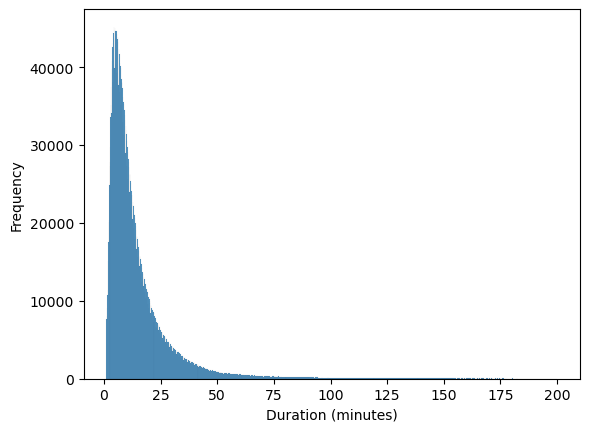

In [41]:
#Histogram plot of duration after dropping rides > 200 mins long
sns.histplot(df['duration'], kde=False)
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

In [42]:
df['duration'].describe()

count   4234282.00
mean         15.04
std          16.99
min           1.00
25%           5.83
50%           9.98
75%          17.65
max         200.00
Name: duration, dtype: float64

From the histogram plot, it looks much better, and we can proceed to create and export the new data set since there are certain columns that I do not want included in the data set that I'll be using for analysis.

# Create new dataframe in order to analyse ride duration

In [43]:
#Create a separate dataset without the start and end station ids
#the start and end stations (names, ids and locations) are not required here, but I do not want to drop it from the original dataframe
station_id_removed_df = df[['ride_id','rideable_type','started_at','ended_at','start_station_name','end_station_name','start_lat','start_lng','end_lat','end_lng','duration','hour','date','day','month','member_casual']]
station_id_removed_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,duration,hour,date,day,month,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,Hampden Ct & Diversey Ave,41.92,-87.65,41.93,-87.64,10.85,20,21,Saturday,January,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,Greenwood Ave & 47th St,41.80,-87.59,41.81,-87.60,8.48,15,10,Tuesday,January,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,Valli Produce - Evanston Plaza,42.01,-87.69,42.04,-87.70,13.23,7,2,Monday,January,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,Greenwood Ave & 47th St,41.80,-87.59,41.81,-87.60,8.77,10,22,Sunday,January,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,Greenwood Ave & 47th St,41.80,-87.59,41.81,-87.60,15.32,13,12,Thursday,January,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5719872,F74DF9549B504A6B,electric_bike,2023-12-07 13:15:24,2023-12-07 13:17:37,900 W Harrison St,Racine Ave & Congress Pkwy,41.87,-87.65,41.87,-87.66,2.22,13,7,Thursday,December,casual
5719873,BCDA66E761CC1029,classic_bike,2023-12-08 18:42:21,2023-12-08 18:45:56,900 W Harrison St,Racine Ave & Congress Pkwy,41.87,-87.65,41.87,-87.66,3.58,18,8,Friday,December,casual
5719874,D2CF330F9C266683,classic_bike,2023-12-05 14:09:11,2023-12-05 14:13:01,900 W Harrison St,Racine Ave & Congress Pkwy,41.87,-87.65,41.87,-87.66,3.83,14,5,Tuesday,December,member
5719875,3829A0D1E00EE970,electric_bike,2023-12-02 21:36:07,2023-12-02 21:53:45,Damen Ave & Madison St,Morgan St & Lake St*,41.88,-87.67,41.89,-87.65,17.63,21,2,Saturday,December,casual


In [45]:
#export the dataframe to csv
station_id_removed_df.to_csv(r'/Users/jasmine/Documents/GoogleDataAnalytics/Course8/CS1_cyclistic/CyclisticData/csv/combined_cyclistic_data_cleaned.csv', index=False)